In [147]:
# TO DO : 
# - détection outliers/valeurs aberrantes
# - standardisation/normalisation

In [148]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer

In [149]:
# Enjeux de cette prédition :
# - fraude aux impôts ?

In [150]:
# Import data
df = pd.read_csv('data/adult.csv')

In [151]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [153]:
# les NaN sont sous format '?'
df = pd.read_csv('data/adult.csv', na_values='?')

In [154]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [156]:
df['income'].value_counts()
# On remarque que la répartition est inégale : environ un quart

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [157]:
# Age : numeric
# Workclass : category
# fnlwgt : numeric
# education : category
# education.num : category
# marital.status : category
# occupation : category
# relationship : category
# race : category
# sex : category
# capital.gain : numeric
# capital.loss : numeric
# hours.per.week : numeric
# native.country : category
# income : category

## education.num doit être modifié en category

In [158]:
df.groupby('education.num').education.nunique()

education.num
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
Name: education, dtype: int64

In [159]:
df.groupby('education')['education.num'].mean().sort_values()
# Conclusion : on garde la caractère numérique de education.num car ça traduit une relation d'ordre dans le niveau d'études
# On peut ainsi supprimer la colonne education qui n'est que répétition de education.num

education
Preschool        1
1st-4th          2
5th-6th          3
7th-8th          4
9th              5
10th             6
11th             7
12th             8
HS-grad          9
Some-college    10
Assoc-voc       11
Assoc-acdm      12
Bachelors       13
Masters         14
Prof-school     15
Doctorate       16
Name: education.num, dtype: int64

In [160]:
df = df.drop('education', axis=1)

21648


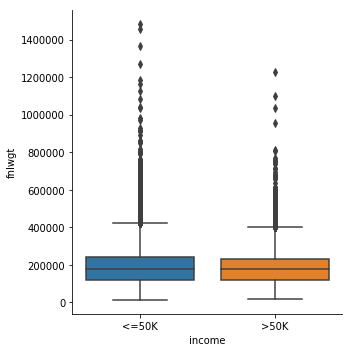

In [161]:
sns.catplot(x="income", y="fnlwgt", kind="box", data=df)
print(df.fnlwgt.nunique())
# Variable non pertinente pour notre problème : même distribution et beaucoup de valeurs distinctes

In [162]:
df = df.drop('fnlwgt', axis=1)

In [163]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Missing data

In [164]:
total_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
table_null = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
table_null
# Conclusion : 3 colonnes avec des données manquantes

,Total,Percent
occupation,1843,0.056601
workclass,1836,0.056386
native.country,583,0.017905
income,0,0.000000
hours.per.week,0,0.000000
capital.loss,0,0.000000
capital.gain,0,0.000000
sex,0,0.000000
race,0,0.000000
relationship,0,0.000000


### Workclass

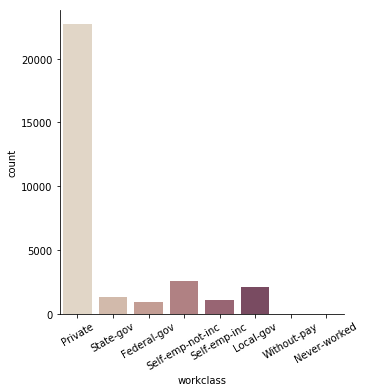

In [165]:
g = sns.catplot(x="workclass", kind="count",palette="ch:.25", data=df) 
g.set_xticklabels(rotation=30)
g
# La classe 'Private' domine très clairement les autres
# On peut donc supposer que les données manquantes sont en réalité des 'Private'

In [166]:
# Imputation valeur workclass
imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['workclass'] = imp_mf.fit_transform(df[['workclass']])

In [167]:
total_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
table_null = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
table_null

,Total,Percent
occupation,1843,0.056601
native.country,583,0.017905
income,0,0.000000
hours.per.week,0,0.000000
capital.loss,0,0.000000
capital.gain,0,0.000000
sex,0,0.000000
race,0,0.000000
relationship,0,0.000000
marital.status,0,0.000000


### Native Country

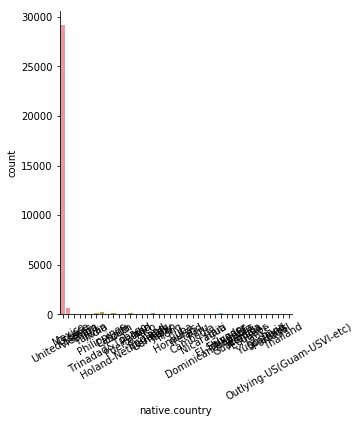

In [168]:
g = sns.catplot(x="native.country", kind="count", data=df)
g.set_xticklabels(rotation=30)
g
# Graphe peu lisible mais on voit clairement que la grosse majorité des personnes ont les USA pour pays d'origine.

In [169]:
df.groupby('native.country').income.count().sort_values(ascending=False)
# Confirmé par ces stats

native.country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [170]:
# Imputation valeur native.country
df['native.country'] = imp_mf.fit_transform(df[['native.country']])

In [171]:
total_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
table_null = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
table_null

,Total,Percent
occupation,1843,0.056601
income,0,0.000000
native.country,0,0.000000
hours.per.week,0,0.000000
capital.loss,0,0.000000
capital.gain,0,0.000000
sex,0,0.000000
race,0,0.000000
relationship,0,0.000000
marital.status,0,0.000000


### Occupation - manual filling

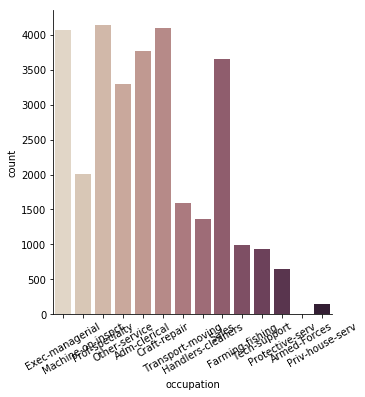

In [172]:
g = sns.catplot(x="occupation", kind="count", palette="ch:.25", data=df)
g.set_xticklabels(rotation=30)
g
# Pas d'occupation qui ressort particulièrement
# Comment choisir quelle occupation imputer ?

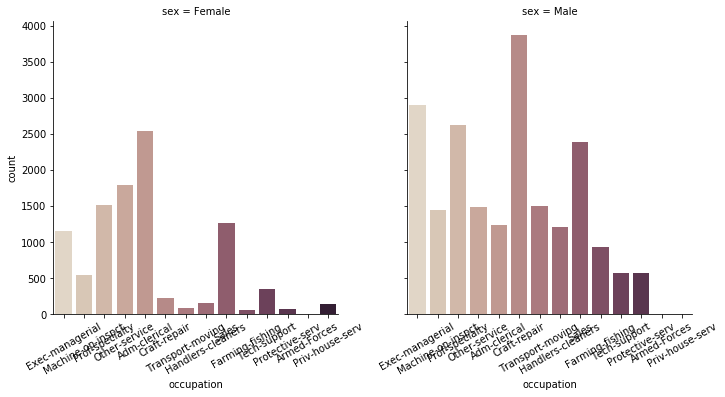

In [173]:
g = sns.catplot(x="occupation", kind="count", palette="ch:.25", data=df, col='sex')
g.set_xticklabels(rotation=30)
g
# On voit que c'est un peu plus différencié en fonction du sexe. 
# On prend le most_frequent dans les 2 catégories

In [174]:
df[df['sex']=='Male'] = df[df['sex']=='Male'].fillna('Craft-repair')
df[df['sex']=='Female'] = df[df['sex']=='Female'].fillna('Adm-clerical')

In [175]:
total_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
table_null = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
table_null

,Total,Percent
income,0,0.0
native.country,0,0.0
hours.per.week,0,0.0
capital.loss,0,0.0
capital.gain,0,0.0
sex,0,0.0
race,0,0.0
relationship,0,0.0
occupation,0,0.0
marital.status,0,0.0


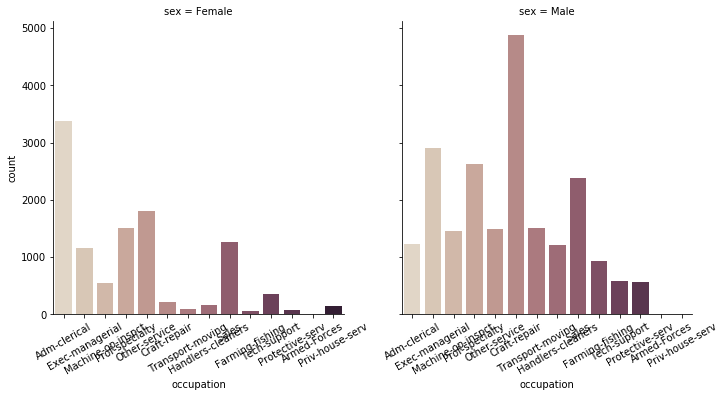

In [176]:
g = sns.catplot(x="occupation", kind="count", palette="ch:.25", data=df, col='sex')
g.set_xticklabels(rotation=30)
g
# Pas tout à fait satisfaisant mais mieux que sans distinction

### Occupation - filling with KNN prediction

In [ ]:
# On copie le df dans un nouvel objet 'data' sur lequel on applique les traitements préliminaires au KNN
data = df.copy()
data.drop('income', axis=1, inplace=True)

In [ ]:
def transform(data):
    data['native.country'] = [1 if x == 'United-States' else 0 for x in data['native.country']]
    data['workclass'] = [1 if x == 'Private' else 0 for x in data['workclass']]
    data['race'] = [1 if x == 'White' else 0 for x in data['race']]
    data['sex'] = [1 if x == 'Male' else 0 for x in data['sex']]
    
transform(data)

In [ ]:
def train_set(data):
    return data.dropna()

train = train_set(data)

In [ ]:
def prediction_set(data):
    return data[data['occupation'].isnull()].drop('occupation', axis=1)

prediction = pd.get_dummies(prediction_set(data))

In [ ]:
X = pd.get_dummies(train.drop('occupation', axis=1))
Y = train['occupation']

In [ ]:
# Trouver la meilleure valeur de k
x = range(1,21)
y = [np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=i), X, Y, scoring='accuracy', cv=5)) for i in x]
plt.scatter(x,y)
plt.xlabel('k')
plt.ylabel('Accuracy')

In [ ]:
# Choix de k=20
clf_knn = KNeighborsClassifier(n_neighbors=20)
clf_knn.fit(X,Y)
result_knn = clf_knn.predict(prediction)

In [ ]:
# Calcul du score
scores = cross_val_score(clf_knn, X, Y, cv=5, scoring='accuracy') #accuracy, f1
np.mean(scores),np.std(scores)

In [ ]:
# Inscrire les résultats de la prédiction dans le df 'prediction'
prediction['occupation']=[x for x in result_knn]

In [ ]:
# Filling du df initial avec les valeurs prédites
def complete_with_prediction(data, prediction):
    complete_data = data.copy()
    for index in prediction.index:
        complete_data.loc[index,'occupation'] = prediction.loc[index,'occupation']
    return complete_data

# On applique cette fonction au df initial (et pas à 'data' qui était une copie) pour remplir les données manquantes
df = complete_with_prediction(df, prediction)

In [ ]:
def distribution_statistics(dataframe):
    total = dataframe.groupby('occupation').count()['age']
    percent = round(dataframe.groupby('occupation').count()['age']/dataframe.dropna()['age'].count(),6)*100
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
stats_ini = distribution_statistics(data)  # répartition des différentes 'occupations' avant remplissage des NaN
stats_fin = distribution_statistics(df)  # répartition des différentes 'occupations' après remplissage des NaN

In [ ]:
# Comparaison en pourcentage
fig = plt.figure()
plt.plot(stats_ini.index, stats_ini['Percent'],'b+')  # en bleu : données brutes
plt.plot(stats_fin.index, stats_fin['Percent'],'r+')  # en rouge : données complétées par les prédictions
plt.xticks(rotation=90)
plt.show()

# More general categories

In [177]:
df['native.country'] = ['United-States' if x == 'United-States' else 'Other' for x in df['native.country']]
df['workclass'] = ['Private' if x == 'Private' else 'Other' for x in df['workclass']]
df['race'] = ['White' if x == 'Private' else 'Other' for x in df['race']]

# Dummies

In [178]:
df['native.country'] = [0 if x == 'Other' else 1 for x in df['native.country']]
df['workclass'] = [0 if x == 'Other' else 1 for x in df['workclass']]
df['sex'] = [0 if x == 'Female' else 1 for x in df['sex']]
df['race'] = [0 if x == 'Other' else 1 for x in df['sex']]
df['income'] = [0 if x == '<=50K' else 1 for x in df['income']]

In [179]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,1,9,Widowed,Adm-clerical,Not-in-family,1,0,0,4356,40,1,0
1,82,1,9,Widowed,Exec-managerial,Not-in-family,1,0,0,4356,18,1,0
2,66,1,10,Widowed,Adm-clerical,Unmarried,1,0,0,4356,40,1,0
3,54,1,4,Divorced,Machine-op-inspct,Unmarried,1,0,0,3900,40,1,0
4,41,1,10,Separated,Prof-specialty,Own-child,1,0,0,3900,40,1,0


In [180]:
df.groupby('marital.status').age.count()
# On remarque 3 gros groupes : mariés, séparés et jamais mariés

marital.status
Divorced                  4443
Married-AF-spouse           23
Married-civ-spouse       14976
Married-spouse-absent      418
Never-married            10683
Separated                 1025
Widowed                    993
Name: age, dtype: int64

In [181]:
marital_stat = {'Divorced':'Separated', 'Separated':'Separated', 'Widowed':'Separated', 
                'Married-AF-spouse':'Married', 'Married-civ-spouse':'Married', 'Married-spouse-absent':'Married',
               'Never-married':'Never married'}

In [182]:
df['marital.status'] = [marital_stat[x] for x in df['marital.status']]

In [183]:
df.groupby('marital.status').age.count()

marital.status
Married          15417
Never married    10683
Separated         6461
Name: age, dtype: int64

In [184]:
df.groupby('relationship').age.count()

relationship
Husband           13193
Not-in-family      8305
Other-relative      981
Own-child          5068
Unmarried          3446
Wife               1568
Name: age, dtype: int64

In [185]:
new_relationship = {'Husband':'Couple', 'Wife':'Couple', 'Unmarried':'Couple', 
                'Own-child':'Family', 'Other-relative':'Family', 'Not-in-family':'Other'}
df['relationship'] = [new_relationship[x] for x in df['relationship']]

In [186]:
df.groupby('relationship').age.count()

relationship
Couple    18207
Family     6049
Other      8305
Name: age, dtype: int64

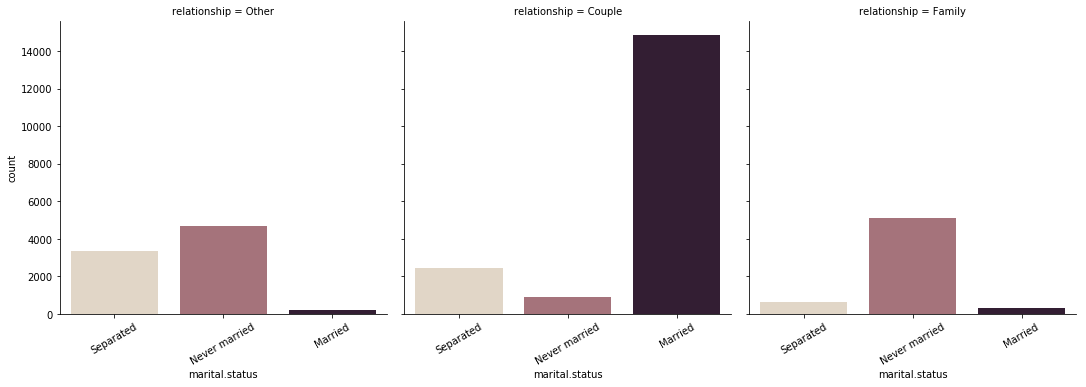

In [187]:
g = sns.catplot(x="marital.status", kind="count", palette="ch:.25", data=df, col='relationship')
g.set_xticklabels(rotation=30)
g

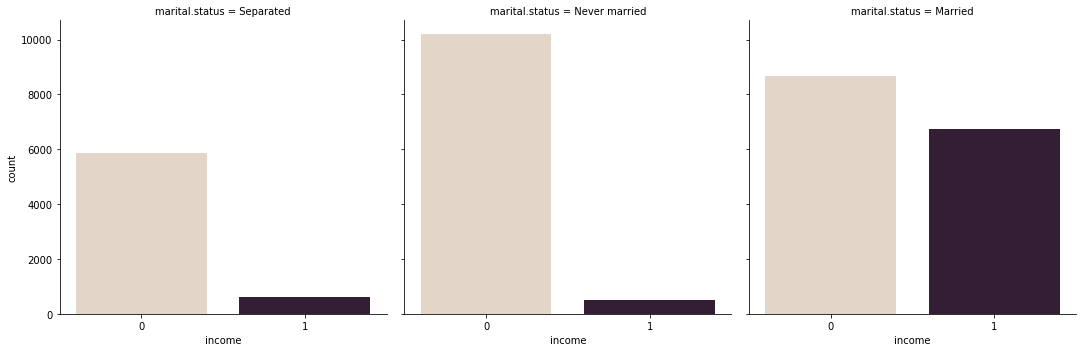

In [188]:
g = sns.catplot(x="income", kind="count", palette="ch:.25", data=df, col='marital.status')

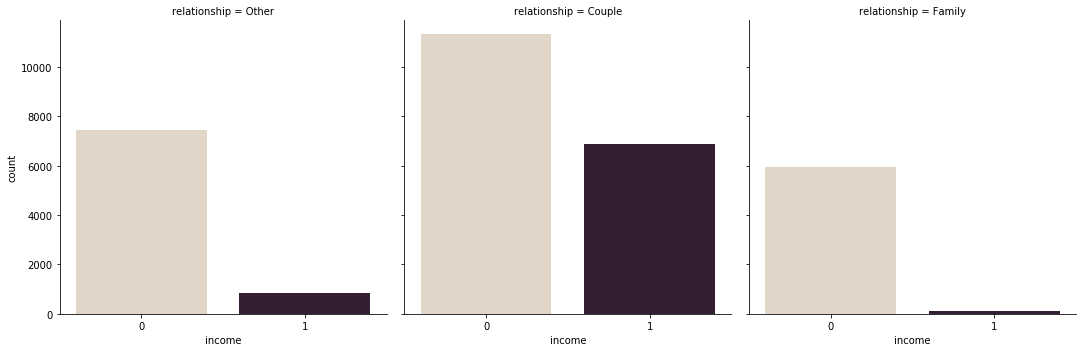

In [189]:
g = sns.catplot(x="income", kind="count", palette="ch:.25", data=df, col='relationship')

In [190]:
# Il semble que relationship et marital.status se recoupent. A voir si on en garde qu'un des 2
# TO DO : tester avec chi test si possible

# Corrélation

In [191]:
from scipy.stats import spearmanr
spearmanr(df['education.num'], df['hours.per.week'])
# Certaine corrélation entre l'éducation et les horaires
# A voir si pertinent ou non

SpearmanrResult(correlation=0.16721512251332687, pvalue=8.30313002330416e-203)

#### Chi2 test

In [192]:
obs = np.array(df.groupby(['marital.status', 'relationship']).age.count().unstack())

In [193]:
from scipy.stats import chi2_contingency
chi2_contingency(obs)

(23442.486069399376,
 0.0,
 4,
 array([[8620.66026842, 2864.08381192, 3932.25591966],
        [5973.56902429, 1984.62783698, 2724.80313872],
        [3612.77070729, 1200.28835109, 1647.94094162]]))

In [194]:
# A revoir, le calcul semble foireux

In [195]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,1,9,Separated,Adm-clerical,Other,1,0,0,4356,40,1,0
1,82,1,9,Separated,Exec-managerial,Other,1,0,0,4356,18,1,0
2,66,1,10,Separated,Adm-clerical,Couple,1,0,0,4356,40,1,0
3,54,1,4,Separated,Machine-op-inspct,Couple,1,0,0,3900,40,1,0
4,41,1,10,Separated,Prof-specialty,Family,1,0,0,3900,40,1,0


In [196]:
df_dummies = pd.get_dummies(df)

In [197]:
df_dummies.head()

,age,workclass,education.num,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,...,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Couple,relationship_Family,relationship_Other
0,90,1,9,1,0,0,4356,40,1,0,...,0,0,0,0,0,0,0,0,0,1
1,82,1,9,1,0,0,4356,18,1,0,...,0,0,0,0,0,0,0,0,0,1
2,66,1,10,1,0,0,4356,40,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,1,4,1,0,0,3900,40,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,1,10,1,0,0,3900,40,1,0,...,0,0,1,0,0,0,0,0,1,0


# Models

In [198]:
X = df_dummies.drop('income', axis=1)
Y = df_dummies['income']

In [199]:
from sklearn.model_selection import cross_val_score

## K-nearest-neighbors

In [200]:
# La répartition de income étant inégale (plus de 0 que de 1), 
# on peut s'attendre à ce que cette méthode soit peu efficace, surtout avec un k grand
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf_knn, X, Y, cv=5, scoring='accuracy')
np.mean(scores),np.std(scores)

(0.7729811214841155, 0.033232662051840646)

In [201]:
scores = cross_val_score(clf_knn, X, Y, cv=5, scoring='f1')
np.mean(scores),np.std(scores)

(0.4954347440789445, 0.09803957220932365)

In [203]:
scores = cross_val_score(clf_knn, X, Y, cv=5, scoring='roc_auc')
np.mean(scores),np.std(scores)

(0.736662801104844, 0.08968944762976404)

Text(0,0.5,'Accuracy')

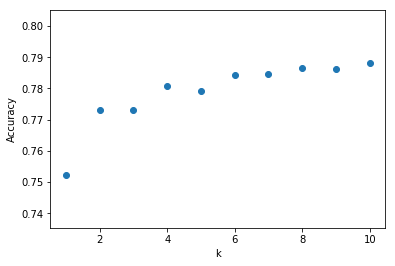

In [202]:
x = range(1,11)
y = [np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=i), X, Y, scoring='accuracy', cv=5)) for i in x]
plt.scatter(x,y)
plt.xlabel('k')
plt.ylabel('Accuracy')
# Conclusion : le score plafonne à 0.79
# Pas très convaincant car au hasard envrion 0.75

Text(0,0.5,'ROC AUC')

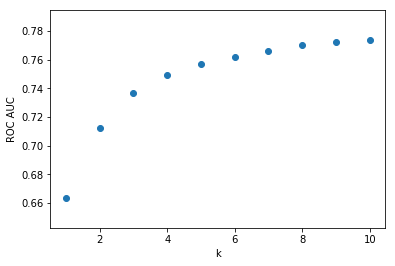

In [204]:
x = range(1,11)
y = [np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=i), X, Y, scoring='roc_auc', cv=5)) for i in x]
plt.scatter(x,y)
plt.xlabel('k')
plt.ylabel('ROC AUC')

# Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()

In [118]:
scores = cross_val_score(clf_lr, X, Y, cv=5, scoring='accuracy')
np.mean(scores),np.std(scores)
# Conclusion : toujours score moyen, car très proche du score au hasard

(0.8190185071173095, 0.03571713455059816)

In [119]:
scores = cross_val_score(clf_lr, X, Y, cv=5, scoring='f1')
np.mean(scores),np.std(scores)

(0.5778578428154048, 0.06889928869792923)

## Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_features='auto') #auto = racine de p

#### Grid Search

In [104]:
from sklearn.model_selection import GridSearchCV

In [129]:
n_estimators = [i for i in range(20,301,20)]
parameters = {'n_estimators': n_estimators}
clf_gs_rf = GridSearchCV(clf_rf, parameters, cv=5, scoring='accuracy')
clf_gs_rf.fit(X, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [130]:
clf_gs_rf.cv_results_

{'mean_fit_time': array([0.47026033, 0.96857619, 1.36124954, 1.81336732, 2.24122868,
        2.70003104, 3.14416986, 3.60836473, 4.03197641, 4.48926587,
        4.93068933, 5.37461061, 5.81075907, 6.32234778, 6.73390031]),
 'std_fit_time': array([0.01257888, 0.0750216 , 0.03476713, 0.02307195, 0.01958939,
        0.02450259, 0.03711107, 0.06902278, 0.05387583, 0.06243162,
        0.06941442, 0.06040274, 0.08296365, 0.05792565, 0.10078333]),
 'mean_score_time': array([0.03740721, 0.07231035, 0.10114717, 0.13276205, 0.16428051,
        0.19628477, 0.22547536, 0.25385342, 0.29467793, 0.32380695,
        0.35474286, 0.38158789, 0.40970421, 0.45195823, 0.47600918]),
 'std_score_time': array([0.00426902, 0.00927777, 0.00384463, 0.00436805, 0.00662731,
        0.01391928, 0.00891081, 0.00684763, 0.01765054, 0.012876  ,
        0.01475798, 0.00865888, 0.01659029, 0.01835204, 0.01816986]),
 'param_n_estimators': masked_array(data=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240,
        

In [137]:
clf_rf = RandomForestClassifier(n_estimators=120, max_features='auto')
scores = cross_val_score(clf_rf, X, Y, cv=5, scoring='accuracy')
np.mean(scores), np.std(scores)

(0.791990904790306, 0.026793312011050636)

In [136]:
#clf_rf = RandomForestClassifier(n_estimators=120, max_features='auto')
#scores = cross_val_score(clf_rf, X.drop(['relationship_Couple', 'relationship_Family', 'relationship_Other'],axis=1), Y, cv=5, scoring='accuracy')
#np.mean(scores), np.std(scores)

(0.789442009950992, 0.028323421788484994)

In [134]:
scores = cross_val_score(clf_rf, X, Y, cv=5, scoring='f1')
np.mean(scores), np.std(scores)

(0.5111526542269014, 0.10702288203020732)

In [139]:
clf_rf.fit(X,Y)
clf_rf.feature_importances_

array([2.49111532e-01, 1.94858386e-02, 1.38087766e-01, 0.00000000e+00,
       2.16551233e-02, 1.25042594e-01, 4.10414339e-02, 1.23689200e-01,
       1.04903693e-02, 7.82570106e-02, 2.84554283e-02, 1.47750126e-02,
       5.71859413e-03, 1.51462182e-05, 6.62602586e-03, 2.09106862e-02,
       4.96710923e-03, 3.17582439e-03, 3.89476734e-03, 6.69898095e-03,
       1.39589635e-04, 1.67560154e-02, 3.23058341e-03, 6.87902217e-03,
       5.27870958e-03, 4.42711446e-03, 4.18477335e-02, 9.66734435e-03,
       9.67544500e-03])

In [140]:
X.head()

,age,workclass,education.num,race,sex,capital.gain,capital.loss,hours.per.week,native.country,marital.status_Married,...,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Couple,relationship_Family,relationship_Other
0,90,1,9,1,0,0,4356,40,1,0,...,0,0,0,0,0,0,0,0,0,1
1,82,1,9,1,0,0,4356,18,1,0,...,0,0,0,0,0,0,0,0,0,1
2,66,1,10,1,0,0,4356,40,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,1,4,1,0,0,3900,40,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,1,10,1,0,0,3900,40,1,0,...,0,0,1,0,0,0,0,0,1,0


## AdaBoosting

In [145]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier()
n_estimators = [i for i in range(20,601,20)]
parameters = {'n_estimators': n_estimators}
clf_gs_ada = GridSearchCV(clf_ada, parameters, cv=5, scoring='accuracy')
clf_gs_ada.fit(X, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [146]:
clf_gs_ada.cv_results_

{'mean_fit_time': array([0.31901264, 0.6316772 , 0.9390028 , 1.2309957 , 1.53508801,
        1.8356967 , 2.13897719, 2.45956039, 2.80648003, 3.07461891,
        3.35518947, 3.64173436, 3.94696584, 4.26888695, 4.58172398,
        4.87045007, 5.1695394 , 5.48131943, 5.77624674, 6.10591774,
        6.42164378, 6.70854573, 6.98473759, 7.30219455, 7.62404881,
        7.90231867, 8.19724307, 8.56041703, 8.81808968, 9.13438234]),
 'std_fit_time': array([0.00726491, 0.0163549 , 0.01764775, 0.01894034, 0.01783396,
        0.01019746, 0.01448314, 0.02270876, 0.06500555, 0.02802343,
        0.02955644, 0.03355736, 0.0144036 , 0.03974382, 0.03391159,
        0.01069069, 0.01724433, 0.03787198, 0.01331455, 0.02424406,
        0.05084638, 0.0387913 , 0.05415473, 0.02982045, 0.0545995 ,
        0.06203425, 0.04546609, 0.03858644, 0.07943588, 0.09346587]),
 'mean_score_time': array([0.02374454, 0.04080949, 0.06156697, 0.07444701, 0.09585223,
        0.11246381, 0.13125916, 0.15365782, 0.17867885, 0.17

## Support Vector Machine

In [ ]:
from sklearn import svm
clf_svm = svm.SVC()
scores = cross_val_score(clf_svm, X, Y, cv=5, scoring='accuracy')
np.mean(scores), np.std(scores)
#parameters = {'gamma': ['linear', 'rbf', 'scale']}
#clf_gs_svm = GridSearchCV(clf_svm, parameters, cv=5, scoring='accuracy')
#clf_gs_svm.fit(X, Y)